In [12]:
import matplotlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from detector import detector

                     STARTING DETECTOR



/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


config/yolov3.cfg

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.102725
	+ Batch 1, Inference Time: 0:00:00.103084
	+ Batch 2, Inference Time: 0:00:00.091816
	+ Batch 3, Inference Time: 0:00:00.105376

Iterating images:
(0) Image: 'data/images/bottle.JPG'
data/images/bottle.JPG
	+ Label: cup, Conf: 0.98516
	+ Label: bottle, Conf: 0.99805


<Figure size 432x288 with 0 Axes>

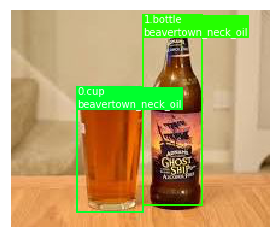

(1) Image: 'data/images/bottles.JPG'
data/images/bottles.JPG
	+ Label: bottle, Conf: 0.99972
	+ Label: bottle, Conf: 0.99992
	+ Label: bottle, Conf: 0.99962
	+ Label: bottle, Conf: 0.99977
	+ Label: bottle, Conf: 0.99988
	+ Label: bottle, Conf: 0.99985


<Figure size 432x288 with 0 Axes>

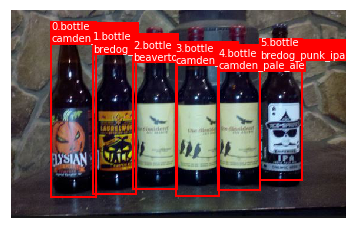

(2) Image: 'data/images/gr_1.JPG'
data/images/gr_1.JPG
	+ Label: wine glass, Conf: 0.99767
	+ Label: bottle, Conf: 0.99960


ValueError: tile cannot extend outside image

<Figure size 432x288 with 0 Axes>

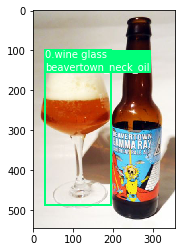

In [64]:
class Opt:
    image_folder = 'data/images/'
    show_img = True
    save_fig = False
    
    model_def = "config/yolov3.cfg"
    weights_path = "weights/yolov3.weights"
    class_path = "data/coco.names"
    
    conf_thres = 0.8
    nms_thres = 0.4
    batch_size = 1
    n_cpu = 0
    img_size = 416
    
    
opt = Opt()

imgs, dets = detector(opt)

In [97]:
x1, y1, x2, y2 = dets[0][0][:4]
print(dets[0][0])
print(x1, y1, x2, y2)

tensor([110.2822,   4.6508, 159.5514, 162.9955,   0.9999,   0.9981,  39.0000])
tensor(110.2822) tensor(4.6508) tensor(159.5514) tensor(162.9955)


In [34]:
from fastai.vision import load_learner, open_image
from pathlib import Path

# -------------------- LOAD CLASSIFICATION MODEL ------------------- #
# Fastai craft brands
c_path = Path('data/training')
learn = load_learner(c_path)
# ------------------------------------------------------------------ #


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [32]:
o = open_image(imgs[0])